### Import necessary modules

In [1]:
from tensorflow.keras.datasets.fashion_mnist import load_data
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
import keras

### Display loaded data

In [7]:
def display_img(img_set, title_set):
  n = len(title_set)
  for i in range(n):
    plt.subplot(3, 5, i + 1)
    plt.imshow(img_set[i], cmap = 'gray')
    plt.title(title_set[i])
  plt.show()
  plt.close()


### Load Dataset

trainX.shape: (60000, 28, 28), trainY.shape: (60000,), testX.shape: (10000, 28, 28), testY.shape: (10000,))
trainX.dtype: uint8, trainY.dtype: uint8, testX.dtype: uint8, testY.dtype: uint8
trainX.Range: 255 - 0, testX.Range: 255 - 0


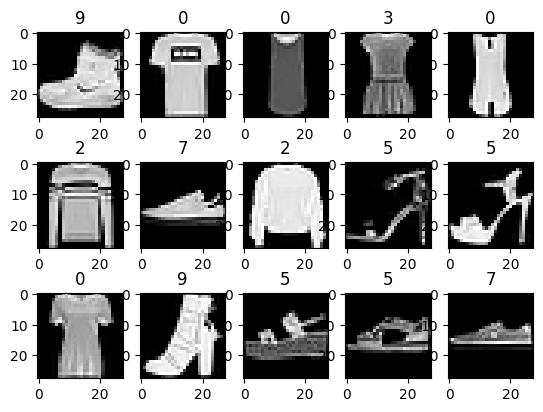

In [10]:
(trainX, trainY), (testX, testY) = load_data()

# # Investigate loaded data
print('trainX.shape: {}, trainY.shape: {}, testX.shape: {}, testY.shape: {})'.format(trainX.shape, trainY.shape, testX.shape, testY.shape))
print('trainX.dtype: {}, trainY.dtype: {}, testX.dtype: {}, testY.dtype: {}'.format(trainX.dtype, trainY.dtype, testX.dtype, testY.dtype))
print('trainX.Range: {} - {}, testX.Range: {} - {}'.format(trainX.max(), trainX.min(), testX.max(), testX.min()))

# Dispaly some loaded image data
display_img(trainX[:15], trainY[:15])   


### Prepare datasets

In [ ]:
trainX = np.expand_dims(trainX, axis = -1)
testX = np.expand_dims(testX, axis = -1)

# Investigate updated x
# print('trainX.shape: {}, testX.shape: {})'.format(trainX.shape, testX.shape))
# print('trainX.dtype: {}, testX.dtype: {}'.format(trainX.dtype, testX.dtype))
# print('trainX.Range: {} - {}, testX.Range: {} - {}'.format(trainX.max(), trainX.min(), testX.max(), testX.min()))

# Turn y into one-hot-encoding, so that we can use 10 neurons in the output layer
trainY = to_categorical(trainY, num_classes = 10)
testY = to_categorical(testY, num_classes = 10)

# Investigate updated y
# print('trainY.shape: {}, testY.shape: {})'.format(trainY.shape, testY.shape))
# print('trainY.dtype: {}, testX.dtype: {}'.format(trainY.dtype, testY.dtype))
print(trainY[:5])


trainX.shape: (60000, 28, 28, 1), testX.shape: (10000, 28, 28, 1))
trainX.dtype: uint8, testX.dtype: uint8
trainX.Range: 255 - 0, testX.Range: 255 - 0
trainY.shape: (60000, 10), testY.shape: (10000, 10))
trainY.dtype: float64, testX.dtype: float64
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
trainX = trainX.astype("float32") / 255
testX = testX.astype("float32") / 255


### Build a fully connected neural network

In [7]:
inputs = Input((28, 28, 1), name = 'InputLayer')
x = Flatten()(inputs)
x = Dense(1024, activation = 'relu')(x)
outputs = Dense(10, name = 'OutputLayer', activation = 'softmax')(x)
model = Model(inputs, outputs, name = 'Multi-Class-Classifier')
model.summary()

Model: "Multi-Class-Classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ InputLayer (InputLayer)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 814,090 (3.11 MB)

 Trainable params: 814,090 (3.11 MB)

 Non-trainable params: 0 (0.00 B)

### Train classifier

In [8]:
model.compile(optimizer="rmsprop", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(trainX, trainY, batch_size = 128, validation_split = 0.1, epochs = 10)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7253 - loss: 0.8087 - val_accuracy: 0.8308 - val_loss: 0.4518
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8491 - loss: 0.4105 - val_accuracy: 0.8582 - val_loss: 0.3753
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8719 - loss: 0.3461 - val_accuracy: 0.8728 - val_loss: 0.3500
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8801 - loss: 0.3197 - val_accuracy: 0.8710 - val_loss: 0.3412
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8910 - loss: 0.2952 - val_accuracy: 0.8562 - val_loss: 0.3881
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8937 - loss: 0.2828 - val_accuracy: 0.8783 - val_loss: 0.3358
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9016 - loss: 0.2652 - val_accuracy: 0.8880 - val_loss: 0.3194
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9026 - loss: 0.2585 - val_accuracy: 0.

### Test the performance of the model

In [9]:
model.evaluate(testX, testY)

# Predict Y values
predictY = model.predict(testX)

print('OriginalY   PredictedY')
print('=========   ==========')
for i in range(10):
  print(np.argmax(testY[i]), '\t\t', np.argmax(predictY[i]))


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8721 - loss: 0.3865
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
OriginalY   PredictedY
=========   ==========
9 		 9
2 		 2
1 		 1
1 		 1
6 		 6
1 		 1
4 		 4
6 		 6
5 		 5
7 		 7
